
<a href="https://colab.research.google.com/drive/123w8VOCEviUIx-m0M--mwxExRqRKxAhY#scrollTo=zQw2GjuAbESO" target="_blank" >
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>

  

# Performance comparision on SOTAs
**(Note: This notebook will not run on Ed. Please click the button above to run in Google Colab)**

In [1]:
# Import required libraries
import sys, os, time

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
colors = ['k', 'g', 'r','b','c']
plt.style.use('seaborn-whitegrid')
from helper import ellipse
import pickle

from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input
import timeit

## Loading the data

In [2]:
# Useful dictionary to go from label index to actual label
with open('idx2name.pkl', 'rb') as handle:
    keras_idx_to_name = pickle.load(handle)

In [3]:
# Loading input image and labels
images = np.load("/course/data/x_val.npy") # loaded as RGB
labels = np.load("/course/data/y_val.npy")

# Taking only 100 samples for quicker computation
x_val = images[:100]
y_val = labels[:100]
# One hot encoding the labels
y_val_one_hot = to_categorical(y_val, 1000)

FileNotFoundError: [Errno 2] No such file or directory: '/course/data/x_val.npy'

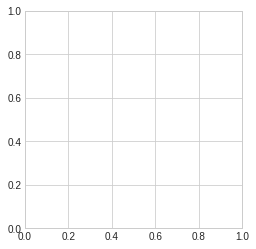

TypeError: Image data of dtype <U1 cannot be converted to float

In [4]:
# Print a sample image and set the label as title
plt.title(___)
plt.imshow(___)

### ⏸ What is the label for the first image in the validation set?
**(Please answer this in quiz)**


#### A. Cabbage Butterfly
#### B. Mixing bowl
#### C. Wok
#### D. French horn

In [0]:
# Submit an answer choice as a string below (eg. if you choose option C, put 'C')
answer1 = '___'

## Benchmark models

In [0]:
# Helper function to get key stats
# (evaluation speed, top-1 % accuracy, total model parameters)
def model_stats(model,x_val,name):
    #Time for evaluation
    time = timeit.timeit(lambda: model.predict(x_val, verbose=1), number=1)
    # Accuracy
    y_pred = model.predict(x_val)
    top_1 = np.any(np.argsort(y_pred)[:,-1:].T == y_val_one_hot.argmax(axis=1),axis=0).mean()
    # Model size 
    params = model.count_params()
    return (time,top_1,params,name)

## SOTA architectures

For this exercise, we will consider the following SOTAs:
- VGG16
- VGG19
- InceptionV3
- ResNet50
- MobileNet

In [0]:
# VGG16 stats
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

# Preprocess step
# We need to call the data because some preprocess steps
# change the value inplace
x_val = np.load("/course/data/x_val.npy") # loaded as RGB
x_val = x_val[:100]
x_val = preprocess_input(x_val)

# Call the VGG16 model
model = ___

# Collect stats 
vgg16stats = model_stats(model,x_val,'VGG16')

In [0]:
# VGG19 stats
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input

x_val = np.load("/course/data/x_val.npy") # loaded as RGB
x_val = x_val[:100]
x_val = preprocess_input(x_val)

# Call the VGG19 model
model = ___

# Collect stats 
vgg19stats = model_stats(model,x_val,'VGG19')

In [0]:
# Inception Stats
from tensorflow.keras.applications.inception_v3 import InceptionV3,preprocess_input

x_val = np.load("/course/data/x_val.npy") # loaded as RGB
x_val = x_val[:100]
x_val = preprocess_input(x_val)

# Call the InceptionV3 model
model = ___

# Collect stats 
inceptionstats = model_stats(model,x_val,'Inception')

In [0]:
# Resnet50 stats
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

x_val = np.load("/course/data/x_val.npy") # loaded as RGB
x_val = x_val[:100]
x_val = preprocess_input(x_val)

# Call the ResNet50 model
model = ___

# Collect stats 
resnetstats = model_stats(model,x_val,'Resnet50')

In [0]:
# MobileNet stats
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
x_val = np.load("/course/data/x_val.npy") # loaded as RGB
x_val = x_val[:100]
x_val = preprocess_input(x_val)

# Call the MobielNetV2 model
model = ___

# Collect stats 
mobilestats = model_stats(model,x_val,'MobileNet')

### ⏸ Which SOTA architecture from above has the **highest** number of trainable parameters?
**(Please answer this in quiz)**

#### A. VGG-16
#### B. VGG-19
#### C. ResNet50
#### D. MobileNet

In [0]:
# Submit an answer choice as a string below (eg. if you choose option C, put 'C')
answer2 = '___'

In [0]:
# Use the helper code below 
# to plot the model stats for each SOTA
fig, ax  = plt.subplots(figsize=(10,6))
for i,val in enumerate([vgg16stats, vgg19stats, inceptionstats,resnetstats, mobilestats]):
    r = val[2]/10**9 + 0.04
    ellipse(val[0]/40,val[1],width=r,height=0.44*r,color = colors[i],ax=ax)
    ax.text(val[0]/40 + 0.035, val[1]+r/4+ 0.004, val[3], va='center', ha='center',fontsize=12)
    
ax.set_ylim([0.6,0.85])
ax.set_ylabel('Top-1 accuracy [%]',fontsize=20)
ax.set_xlabel('Time for evaluation [s]',fontsize=20)
ax.set_xticklabels(range(0,60,8));
ax.set_yticklabels(range(50,110,10));
for axis in ['bottom','left']:
  ax.spines[axis].set_linewidth(3)
  ax.spines[axis].set_color('k')

### 🍲 Larger dataset

Go back and take a larger sample of images, do your results remain consistent?

In [5]:
# Type your answer within in the quotes given
answer3 = 'all models perform equally well. this look wrong'